In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import model_selection

%matplotlib inline

In [2]:
df = pd.read_csv('data/unconv.csv')
df.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


<AxesSubplot:>

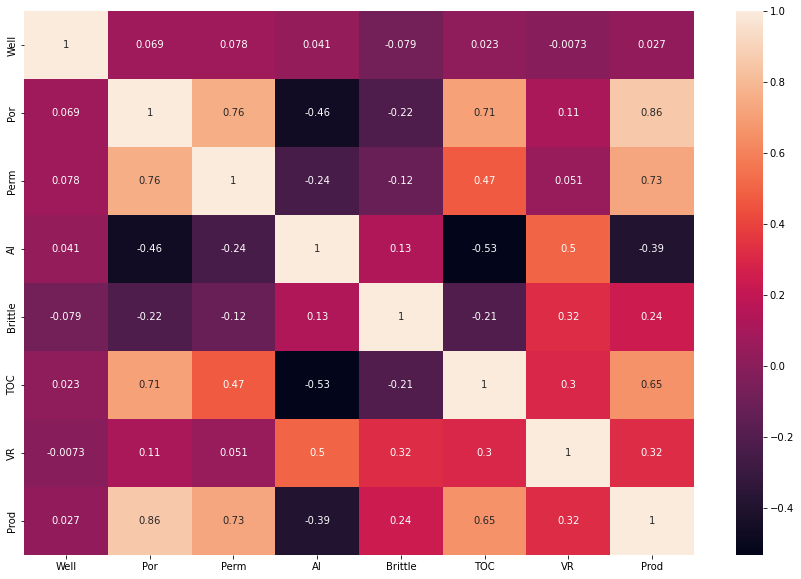

In [11]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)

In [4]:
corr = df.corr()
print(np.linalg.matrix_rank(corr))
print(np.linalg.det(corr))

8
0.0007299388072652082


In [5]:
X = np.column_stack((np.ones(200), df.drop('Prod', axis=1)))
y = df[['Prod']]
print(X.shape)
print(y.shape)

(200, 8)
(200, 1)


In [6]:
w_hat = np.linalg.inv(X.T@X)@X.T@y
print(df.columns)
print(w_hat)


Index(['Well', 'Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR', 'Prod'], dtype='object')
          Prod
0 -1232.308030
1     0.050700
2   230.179140
3   116.239006
4  -365.202301
5    24.994370
6   -78.400929
7   785.259815


In [7]:
new = np.array([[1, 106, 15.32, 3.71, 3.29, 55.99, 1.35, 2.42]])
y_new = 4748.315024
res = new@w_hat
print(res)
print(y_new - res)



          Prod
0  4723.064054
       Prod
0  25.25097


In [10]:
y_pred = X@w_hat
print(metrics.mean_absolute_percentage_error(y, y_pred)*100)

3.627946845134078


In [15]:
df_c = df.drop(['Perm', 'TOC', 'Well'], axis=1)
X = np.column_stack((np.ones(200), df_c.drop('Prod', axis=1)))
w_hat = np.linalg.inv(X.T@X)@X.T@y
print(df_c.columns)
print(w_hat)

Index(['Por', 'AI', 'Brittle', 'VR', 'Prod'], dtype='object')
          Prod
0 -1835.446461
1   293.036246
2  -200.030912
3    27.640982
4   517.402726


In [16]:
y_pred = X@w_hat
print(metrics.mean_absolute_percentage_error(y, y_pred)*100)

4.0441384204360755


In [37]:
#X = np.column_stack(( df_c.drop('Prod', axis=1)))
X = df_c.drop('Prod', axis=1)

In [38]:
poly = preprocessing.PolynomialFeatures(degree=3, include_bias=False)

X = poly.fit_transform(X)
print(X.shape)

lr = linear_model.LinearRegression()

cv_res = model_selection.cross_validate(lr, X, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)

print(cv_res['train_score'].mean()*100)
print(cv_res['test_score'].mean()*100)

(200, 34)
-1.7732404750723667
-2.680875450473757


In [42]:
X = df_c.drop('Prod', axis=1)

In [43]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

poly = preprocessing.PolynomialFeatures(degree=3, include_bias=False)
X = poly.fit_transform(X)

lasso = linear_model.Lasso(alpha=5)

cv_res = model_selection.cross_validate(lasso, X, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print(-cv_res['train_score'].mean()*100)
print(-cv_res['test_score'].mean()*100)

1.8279305719510122
2.2761580665436423


In [44]:
ridge = linear_model.Ridge(alpha=1)
cv_res = model_selection.cross_validate(ridge, X, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print(-cv_res['train_score'].mean()*100)
print(-cv_res['test_score'].mean()*100)

1.8263641269012456
2.7167779450929936
